Задачу будем решать на отрезке  $[0; 100]$ по пространству и   $[0; 1]$ по времени. Шаг равномерной сетки по пространству $h = 0.1$, шаг по времени $\tau = 0.01$. Скорость переноса $c = 50$. Правая часть - нулевая. Начальное условие
\begin{equation} \nonumber
	\mu_2(x) = \frac{1}{1 + \left( \displaystyle \frac{x-20}{10} \right)^{10}}.
\end{equation}
Граничное условие $\mu_1(t) = \mu_2(-ct)$.

Реализовать составную схему, чисто неявную схему и схему с полусуммой. Положить на один график точное решение задачи $\mu_2(x-ct)$, а также результаты расчета по всем трем схемам. Объяснить поведение кривых численного решения.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h = 0.1
tau = 0.01
H = round(100/h + 1)
T = round(1/tau + 1)

x = [h*xx for xx in range(H)]
t = [tau*tt for tt in range(T)]

c = 50

phi = lambda x: 1/(1 + (x/10 - 2)**10)
mu = lambda t: phi(-c*t)

exact_sol = lambda x,t: phi(x - c*t)

In [3]:
def draw(u, x, T, Nsub):
    
    fig, ax = plt.subplots(figsize=(18, 10))

    for subplot in range(1, Nsub + 1):

        p = round(len(u)/(Nsub-1)) * (subplot-1)
        tt = T/(Nsub-1) * (subplot-1)
        if p > len(u)-1:
            p = len(u)-1
            tt = T        
        
        y = u[p][:]
        ex_sol = [exact_sol(xx, tt) for xx in x]
        plt.subplot(Nsub, 1, subplot)
        ax = fig.gca()
        ax.grid()
        plt.plot(x, y, 'b')
        plt.plot(x, ex_sol,'r-.' )
        plt.ylabel(r'$u(t,x)$', fontsize=16)
        plt.title(r'$t$ = {0:.4f}'.format(tt), fontsize = 16)

    plt.show()

In [11]:
def scheme_3(u1, # U[p][n-1]
             u2, # U[p-1][n]
             u3=0  # U[p-1][n-1]
            ):
    return ( u2/tau + c*u1/h )/(1/tau + c/h)


def scheme_4(u1, # U[p][n-1]
             u2, # U[p-1][n]
             u3  # U[p-1][n-1]
            ):
    return ( u1*(c/h - 1/tau) + u2*(1/tau - c/h) + u3*(1/tau + c/h) ) / (1/tau + c/h)

def compos_scheme(  u1, # U[p][n-1]
                    u2, # U[p-1][n]
                    u3, # U[p-1][n-1]
                    ):
    if K > 1:
        return (u1*(c/h - 1/tau) + u3/tau)*h/c
    else:
        return (u2*(1/tau - c/h) + c*u3/h)*h
    

def solver(phi, mu, x, t, scheme):
    
    N = len(x)
    P = len(t)
    
    u = np.zeros((P, N))
    
    u[:,0] = [mu(tt) for tt in t]
    u[0,:] = [phi(xx) for xx in x]
    
    for p in range(1,P):
        for n in range(1,N):
            u[p,n] = scheme(u[p,n-1],u[p-1][n],u[p-1,n-1])
            
    return u

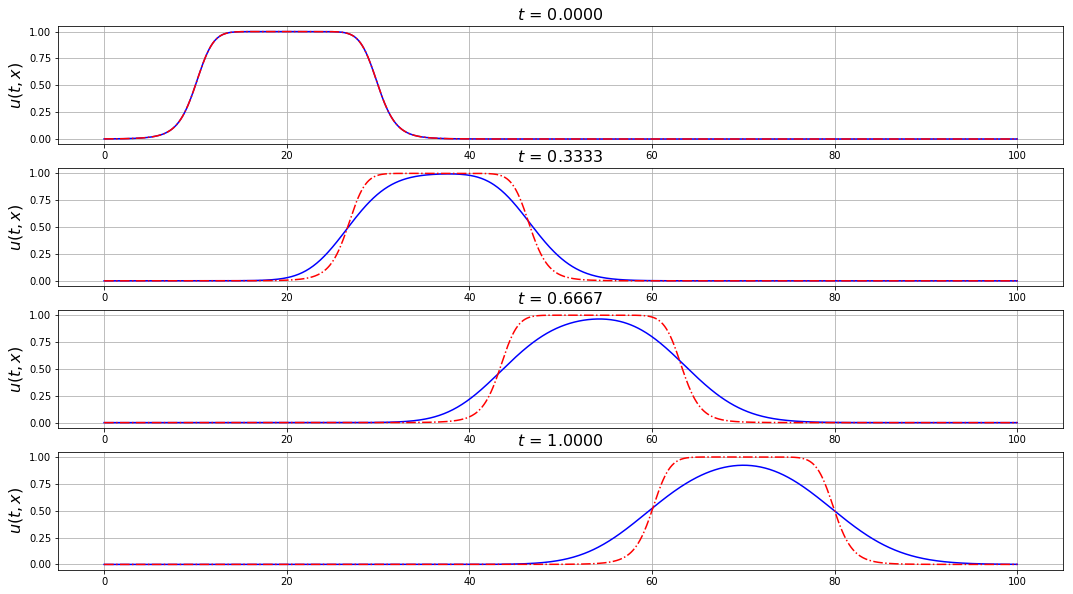

Wall time: 734 ms


In [7]:
%%time
u = solver(phi, mu, x, t, scheme_3)
draw(u,x,1,4)

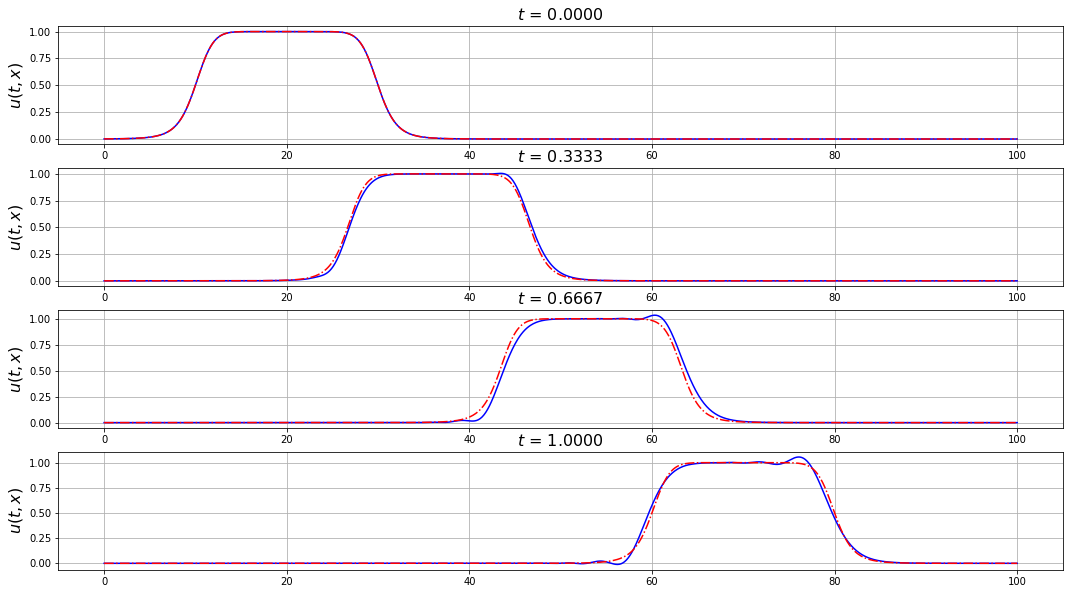

Wall time: 695 ms


In [8]:
%%time
u = solver(phi, mu, x, t, scheme_4)
draw(u, x, 1, 4)

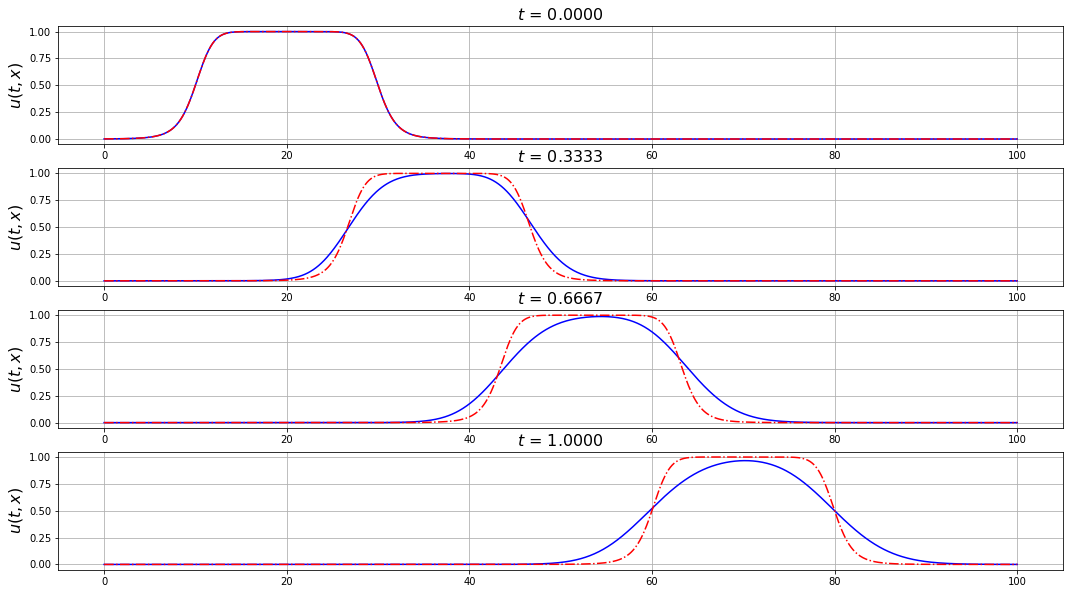

Wall time: 910 ms


In [12]:
%%time
K = c*tau/h
u = solver(phi, mu, x, t, compos_scheme)
draw(u,x,1,4)